# Assignment 1
02689 Advanced Numerical Methods for Differential Equations
- Jeppe Klitgaard <`s250250@dtu.dk`>
- Tymoteusz Barcinski <`s221937@dtu.dk`>
- Pernille Christie <`s204249@dtu.dk`>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import pandas as pd
import scipy
import seaborn as sns
from scipy.special import factorial, gamma

sns.set_theme(style="whitegrid")

## 1 Fourier Methods
### a - Truncated Fourier Expansion

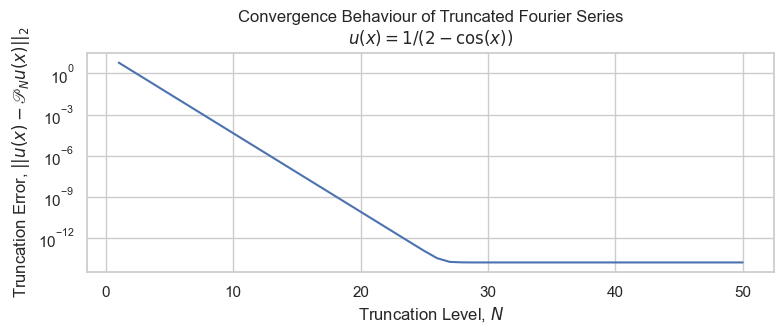

In [2]:
def C_n(n):
    quot = np.sqrt(3) * (2 + np.sqrt(3)) ** np.abs(n)
    return 1 / quot


def u(x):
    return 1.0 / (2.0 - np.cos(x))


x = np.linspace(0, 2 * np.pi, 10000)
y_exact = u(x)

Ns = np.arange(1, 51)
errors = []

for N in Ns:
    y_trunc = np.zeros_like(x, dtype="complex")
    for n in range(-N, N + 1):
        y_trunc += C_n(n) * np.exp(1j * n * x)

    residual = y_exact - y_trunc
    errors.append(np.linalg.norm(residual))

plt.figure(figsize=(8, 3.5))
plt.title(
    "Convergence Behaviour of Truncated Fourier Series\n$u(x) = 1 / (2 - \\cos(x))$"
)
plt.xlabel("Truncation Level, $N$")
plt.ylabel("Truncation Error, $||u(x) - 𝒫︀_N u(x)||_2$")
plt.semilogy(Ns, errors)
plt.grid(True, which="minor", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("report/output/1a_fourier_truncation_convergence.png", dpi=600)


### b - Convergence Behaviour of Discrete Fourier Coefficients

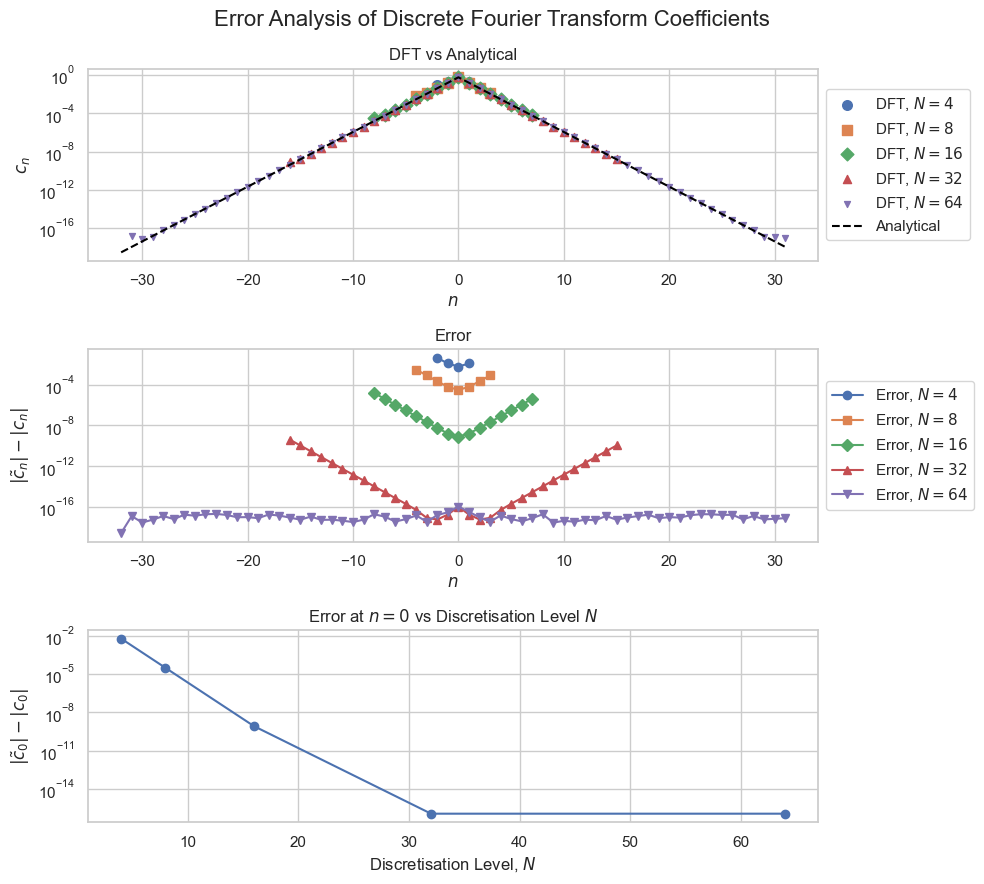

In [3]:
Ns = [4, 8, 16, 32, 64]
x = np.linspace(0, 2 * np.pi, 100)


# Redefine functions to ensure they are not overridden by other u
def C_n(n):
    quot = np.sqrt(3) * (2 + np.sqrt(3)) ** np.abs(n)
    return 1 / quot


def u(x):
    return 1.0 / (2.0 - np.cos(x))


convergence_data = []
for idx, N in enumerate(Ns):
    x_n = np.linspace(0, 2 * np.pi, N, endpoint=False)
    y_n = u(x_n)
    n_range = np.arange(-N // 2, N // 2)

    dft_components = np.fft.fftshift(np.fft.fft(y_n, norm="forward"))
    Cn_components = list(map(C_n, n_range))

    errors = np.abs(dft_components - Cn_components)

    n0_index = np.argmax(n_range == 0)
    error_n0 = errors[n0_index]

    convergence_data.append(
        {
            "N": N,
            "n_range": n_range,
            "dft_magnitudes": np.abs(dft_components),
            "analytical_magnitudes": np.abs(Cn_components),
            "errors": errors,
            "error_n0": error_n0,
        }
    )

fig, axes = plt.subplots(3, 1, figsize=(10, 9))
ax1, ax2, ax3 = axes
markers = ["o", "s", "D", "^", "v"]

# Plot 1: DFT vs Analytical
for datum, marker in zip(convergence_data, markers):
    ax1.scatter(
        datum["n_range"],
        datum["dft_magnitudes"],
        marker=marker,
        label=f"DFT, $N={datum['N']}$",
        s=50 - datum["N"] / 2,
    )

# Plot analytical
ax1.plot(n_range, np.abs(Cn_components), label="Analytical", color="black", ls="--")

ax1.set_title("DFT vs Analytical")
ax1.set_xlabel("$n$")
ax1.set_ylabel("$c_n$")
ax1.semilogy()
ax1.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Plot 2: Error
for datum, marker in zip(convergence_data, markers):
    ax2.plot(
        datum["n_range"],
        datum["errors"],
        label=f"Error, $N={datum['N']}$",
        marker=marker,
        ms=6,
    )
ax2.set_title("Error")
ax2.set_xlabel("$n$")
ax2.set_ylabel(r"$|\tilde{c}_n| - |c_n|$")
ax2.semilogy()
ax2.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Plot 3: Error at n=0 vs N
N_values = [datum["N"] for datum in convergence_data]
error_n0_values = [datum["error_n0"] for datum in convergence_data]
ax3.plot(N_values, error_n0_values, marker="o")
ax3.set_title("Error at $n=0$ vs Discretisation Level $N$")
ax3.set_xlabel("Discretisation Level, $N$")
ax3.set_ylabel("$|\\tilde{c}_0| - |c_0|$")
ax3.semilogy()

plt.suptitle("Error Analysis of Discrete Fourier Transform Coefficients", fontsize=16)
plt.tight_layout()
plt.savefig(
    "report/output/1b_fourier_dft_error_analysis.png", dpi=600, bbox_inches="tight"
)
plt.show()

### c - Nodal Expansion

In [4]:
# TODO: Tymek

### d - Fourier Differentiation Routine

In [5]:
# TODO: Tymek

### e - Convergence in the $L^2$-norm

In [6]:
# TODO: Tymek

### f - Numerical Differentiation using Fast Fourier Transform

In [7]:
# TODO: Tymek

## 2 Polynomial Methods
### h - Jacobi Polynomials

In [8]:
def a(alpha, beta, n1, n2):
    """Calculate a values for given alpha, beta and n
    - last entry must be equal to n-1, n or n+1"""

    if n1 == n2 - 1 and n2 > 0:
        return (2 * (n2 + alpha) * (n2 + beta)) / (
            (2 * n2 + alpha + beta + 1) * (2 * n2 + alpha + beta)
        )
    elif n1 == n2:
        return (alpha**2 - beta**2) / (
            (2 * n2 + alpha + beta + 2) * (2 * n2 + alpha + beta)
        )
    elif n1 == n2 + 1:
        return (2 * n1 * (n1 + alpha + beta)) / (
            (2 * n2 + alpha + beta + 2) * (2 * n2 + alpha + beta + 1)
        )
    elif n1 == -1 and n2 == 0:
        return 0
    else:
        raise ValueError("Invalid n1,n2")


def JacobiP(x, alpha, beta, n):
    x = np.asarray(x)

    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return 0.5 * (alpha - beta + (alpha + beta + 2) * x)

    # Start values
    Pnm2 = np.ones_like(x)  # P_0
    Pnm1 = 0.5 * (alpha - beta + (alpha + beta + 2) * x)  # P_1

    # Iterate recurrence
    for k in range(2, n + 1):
        num = (a(alpha, beta, k - 1, k - 1) + x) * Pnm1 - a(
            alpha, beta, k - 2, k - 1
        ) * Pnm2
        denom = a(alpha, beta, k, k - 1)
        Pn = num / denom
        Pnm2, Pnm1 = Pnm1, Pn

    return Pnm1

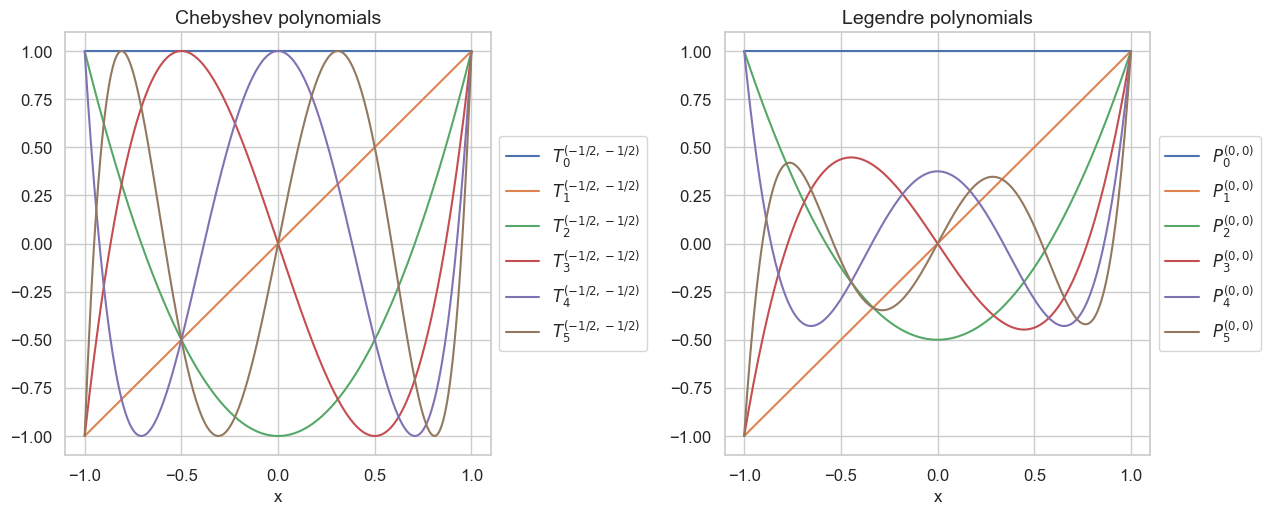

In [9]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))

x = np.linspace(-1, 1, 250)

for n in range(6):
    axs[0].plot(
        x,
        scipy.special.gamma(n + 1)
        * scipy.special.gamma(1 / 2)
        / scipy.special.gamma(n + 1 / 2)
        * JacobiP(x, -1 / 2, -1 / 2, n),
        label=rf"$T_{n}^{{(-1/2, -1/2)}}$",
    )
    axs[1].plot(x, JacobiP(x, 0, 0, n), label=rf"$P_{n}^{{(0,0)}}$")


axs[0].set_title("Chebyshev polynomials", fontsize=14)
axs[1].set_title("Legendre polynomials", fontsize=14)
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)


for ax in axs:
    ax.tick_params(axis="both", labelsize=12)
    ax.set_xlabel("x", fontsize=12)

plt.subplots_adjust(wspace=0.55)

plt.savefig("report/output/2h_jacobi_polynomials.png", dpi=600, bbox_inches="tight")

### i - Numerical Experiments

In [10]:
def JacobiGQ(alpha, beta, N):
    """Translated code given by APEK"""

    if N == 0:
        x = np.array([-(alpha - beta) / (alpha + beta + 2)])
        w = np.array([2])

        return x, w

    J = np.zeros((N + 1, N + 1), dtype=float)

    # Form symmetric matrix from recurrence.
    h1 = 2 * np.arange(N + 1) + alpha + beta
    J = np.diag(-1 / 2 * (alpha**2 - beta**2) / (h1 + 2) / h1)

    off_diag = (
        2.0
        / (h1[:-1] + 2)
        * np.sqrt(
            (
                np.arange(1, N + 1)
                * (np.arange(1, N + 1) + alpha + beta)
                * (np.arange(1, N + 1) + alpha)
                * (np.arange(1, N + 1) + beta)
            )
            / ((h1[:-1] + 1) * (h1[:-1] + 3))
        )
    )

    J += np.diag(off_diag, 1)

    if alpha + beta < 10 * np.finfo(float).eps:
        J[0, 0] = 0.0

    J = J + J.T

    D, V = np.linalg.eigh(J)  # eigh ensures real symmetric matrix handling
    x = D

    w = (
        (V[0, :] ** 2)
        * 2 ** (alpha + beta + 1)
        / (alpha + beta + 1)
        * scipy.special.gamma(alpha + 1)
        * scipy.special.gamma(beta + 1)
        / scipy.special.gamma(alpha + beta + 1)
    )

    return x, w


def JacobiGL(alpha, beta, N):
    x = np.zeros(N + 1, dtype=float)

    if N == 1:
        x = np.array([-1, 1])

        return x

    xint, _ = JacobiGQ(alpha + 1, beta + 1, N - 2)

    x = np.concatenate((np.array([-1]), xint, np.array([1])))

    return x

In [11]:
def CalculateCoefficients(N, K, u):
    """Calculate all K coefficients for grid of size N, for a function given by u"""

    # Quadrature points
    x = JacobiGL(0, 0, N)
    # Quadrature weights
    w = 2 / (N * (N + 1)) / np.power(JacobiP(x, 0, 0, N), 2)

    u_samples = u(x)

    # Precompute Jacobi polynomials for all k=0..K-1
    # Shape: (K, len(x))
    Phi = np.vstack([JacobiP(x, 0, 0, k) for k in range(K)])

    # Compute gamma_k for all k at once
    gamma = np.sum(Phi**2 * w, axis=1)

    # Compute numerator = <u, phi_k> for all k
    numerators = np.sum((u_samples * Phi) * w, axis=1)

    return numerators / gamma

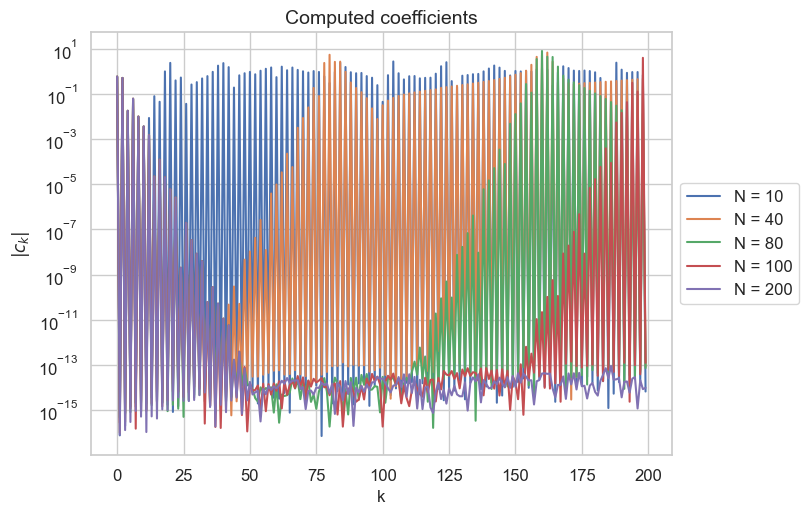

In [12]:
# Calculate all coefficients
K = 200
Ns = [10, 40, 80, 100, 200]


def u(x):
    return 1.0 / (2.0 - np.cos(np.pi * (x + 1)))
    # return np.sin(2*np.pi*(x + 0.1))


coefficients = np.zeros((len(Ns), K), dtype=float)


for i, N in enumerate(Ns):
    coefficients[i, :] = CalculateCoefficients(N, K, u)


# Plot absolte vale of all coefficients
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5.5))

for i in range(len(Ns)):
    ax.plot(abs(coefficients[i]), label=f"N = {Ns[i]}")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
ax.set_xlabel("k", fontsize=12)
ax.set_ylabel(r"$|c_k|$", fontsize=12)
ax.set_title("Computed coefficients", fontsize=14)
ax.tick_params(axis="both", labelsize=12)
ax.set_yscale("log")

plt.savefig("report/output/2i_coefficients.png", dpi=600, bbox_inches="tight")

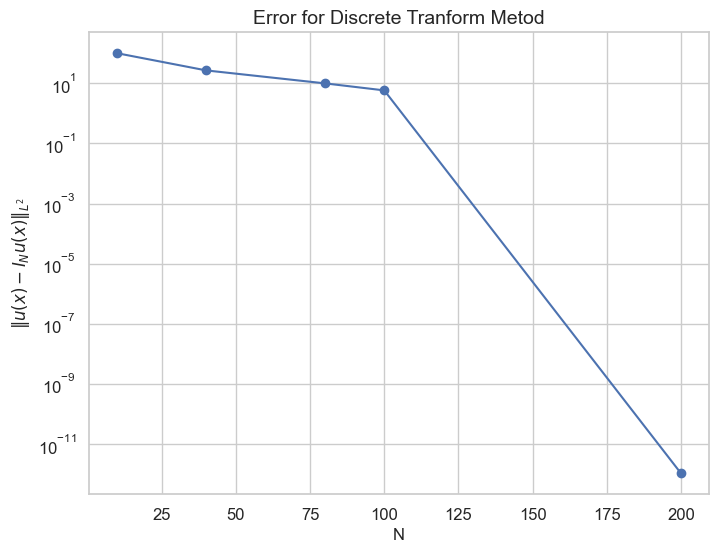

In [13]:
# Plot errors
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

xs = np.linspace(-1, 1, 250)

Phi = np.vstack([JacobiP(xs, 0, 0, k) for k in range(K)])

u_samples = u(xs)

errors = np.zeros_like(Ns, dtype=float)

for i in range(len(Ns)):
    u_approx = coefficients[i] @ Phi

    errors[i] = np.linalg.norm(u_samples - u_approx)


ax.plot(Ns, errors, "-o")
ax.set_xlabel("N", fontsize=12)
ax.set_ylabel(r"$\|u(x) - I_N u(x)\|_{L^2}$", fontsize=12)
ax.set_title("Error for Discrete Tranform Metod", fontsize=14)
ax.tick_params(axis="both", labelsize=12)
ax.set_yscale("log")
plt.savefig("report/output/2i_error_DTM.png", dpi=600)

### j - Generalized Vandermonde Matrix

In [14]:
def VandermondeMatrix(N):
    """Calculate the transposed Vandermonde Matrix for grid of size N"""

    # Calculate abscissus
    xN = JacobiGL(0, 0, N - 1)

    VT = np.zeros((N, N), dtype=float)

    # Calculate the Jacobi polynomials for each column of transposed Vandermonde
    for n in range(N):
        VT[n, :] = JacobiP(xN, 0, 0, n)

    return VT

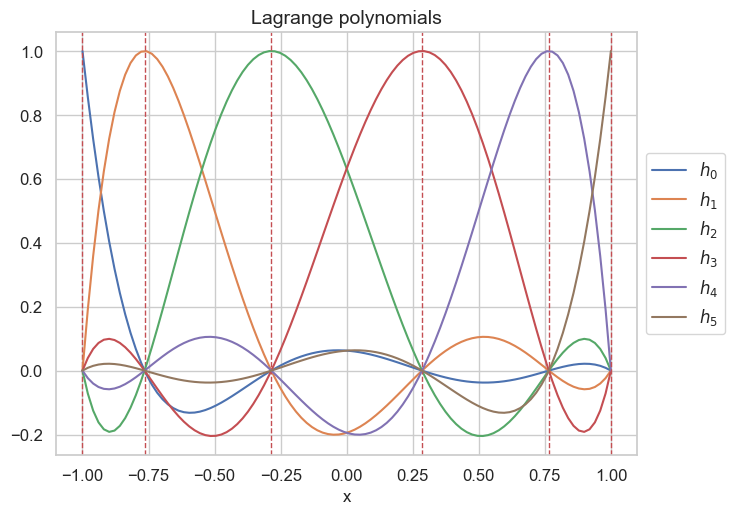

In [15]:
N = 6
nodes = 100

xN = JacobiGL(0, 0, N - 1)

xunif = np.linspace(-1, 1, nodes)

phis = np.zeros((N, nodes), dtype=float)

# Evaluate each jaobi polynomial on the uniform grid
for n in range(N):
    phis[n] = JacobiP(xunif, 0, 0, n)

VT = VandermondeMatrix(N)

hs = np.zeros((N, nodes), dtype=float)

# Solve the equation system for each grid value
for i in range(nodes):
    hs[:, i] = np.linalg.solve(VT, phis[:, i])


# Plot resulting Lagrange polynomials and gridpoints
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5.5))
for n in range(N):
    ax.plot(xunif, hs[n], label=rf"$h_{n}$")
    ax.axvline(x=xN[n], color="r", ls="--", lw=1)


ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
ax.set_xlabel("x", fontsize=12)
ax.set_title("Lagrange polynomials", fontsize=14)
ax.tick_params(axis="both", labelsize=12)
plt.savefig("report/output/2k_lagrange_polynomials.png", dpi=600, bbox_inches="tight")

In [16]:
# Calculate approximations of v


def v(x):
    return np.sin(np.pi * x)


Ns = np.arange(1, 50, 5)

v_exact = v(xunif)

errors = np.zeros_like(Ns, dtype=float)

v_approx = np.zeros((len(Ns), nodes), dtype=float)

for j, N in enumerate(Ns):
    # Calculate DPT coefficients v_hat
    K = N + 1

    v_hat = CalculateCoefficients(N, K, v)

    # Calculate Vandermonde matrix
    VT = VandermondeMatrix(N + 1)

    Phi_unif = np.zeros((N + 1, nodes), dtype=float)

    for n in range(N + 1):
        Phi_unif[n] = JacobiP(xunif, 0, 0, n)

    # From DFT coefficients calculate polynomial representation coefficients
    v_lag = VT.T @ v_hat

    # Calculate Lagrange polynomials as before
    hs = np.zeros((N + 1, nodes), dtype=float)

    for i in range(nodes):
        hs[:, i] = np.linalg.solve(VT, Phi_unif[:, i])

    # Calculate error
    v_approx[j] = np.sum(hs * v_lag[:, None], axis=0)
    errors[j] = np.linalg.norm(v_exact - v_approx[j])

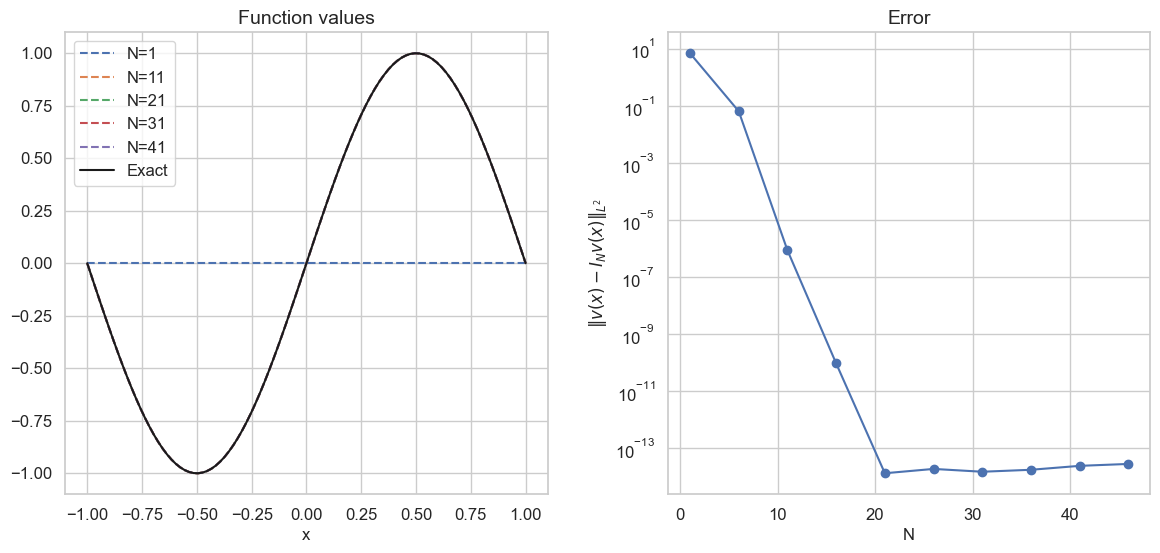

In [17]:
# Plot interpolant vs exact solution and errors
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

for i in range(0, len(Ns), 2):
    ax[0].plot(xunif, v_approx[i], "--", label=f"N={Ns[i]}")


ax[0].plot(xunif, v_exact, "k", label="Exact")
ax[0].legend(fontsize=12)
ax[0].set_title("Function values", fontsize=14)
ax[0].set_xlabel("x")

ax[1].plot(Ns, errors, "-o")
ax[1].set_title("Error", fontsize=14)
ax[1].set_yscale("log")
ax[1].set_xlabel("N")
ax[1].set_ylabel(r"$\|v(x) - I_N v(x)\|_{L^2}$", fontsize=12)


for axis in ax:
    axis.tick_params(axis="both", labelsize=12)

plt.subplots_adjust(wspace=0.25)

plt.savefig("report/output/2k_errors.png", dpi=600)

In [18]:
# To extrapolate, we reuse the code, but change the uniform grid
Ns = np.arange(1, 50, 5)

nodes = 150

xunif = np.linspace(-1.5, 1.5, nodes)

v_exact = v(xunif)

errors = np.zeros_like(Ns, dtype=float)

v_approx = np.zeros((len(Ns), nodes), dtype=float)

for j, N in enumerate(Ns):
    # Calculate DPT coefficients v_hat
    K = N + 1

    v_hat = CalculateCoefficients(N, K, v)

    # Calculate Vandermonde matrix
    VT = VandermondeMatrix(N + 1)

    Phi_unif = np.zeros((N + 1, nodes), dtype=float)

    for n in range(N + 1):
        Phi_unif[n] = JacobiP(xunif, 0, 0, n)

    # From DFT coefficients calculate polynomial representation coefficients
    v_lag = VT.T @ v_hat

    # Calculate Lagrange polynomials
    hs = np.zeros((N + 1, nodes), dtype=float)

    for i in range(nodes):
        hs[:, i] = np.linalg.solve(VT, Phi_unif[:, i])

    # Calculate error
    v_approx[j] = np.sum(hs * v_lag[:, None], axis=0)
    errors[j] = np.linalg.norm(v_exact - v_approx[j])

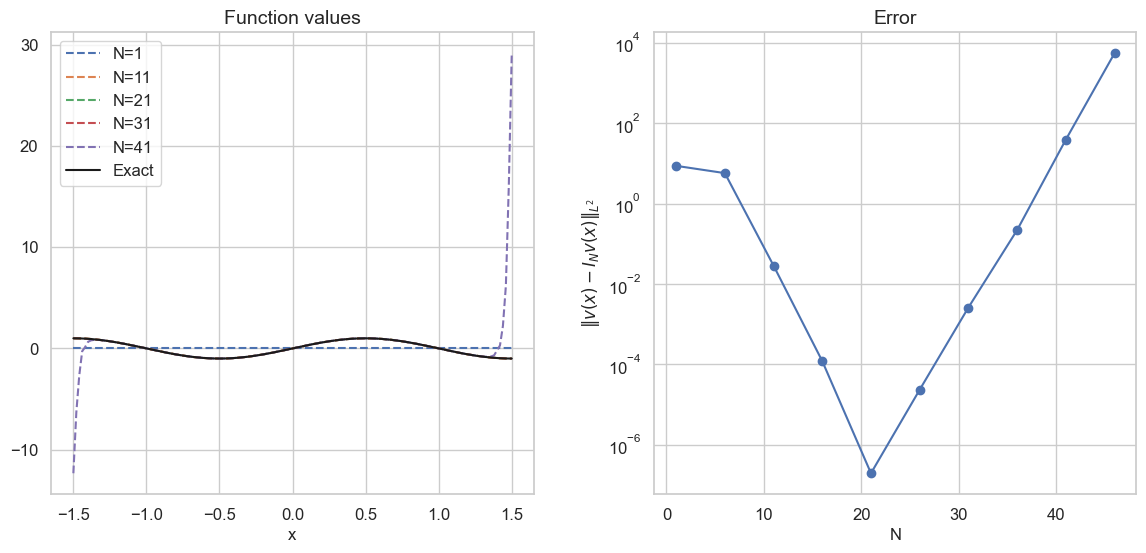

In [19]:
# Plot interpolant vs exact solution and errors
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

for i in range(0, len(Ns) - 1, 2):
    ax[0].plot(xunif, v_approx[i], "--", label=f"N={Ns[i]}")


ax[0].plot(xunif, v_exact, "k", label="Exact")
ax[0].legend(fontsize=12)
ax[0].set_title("Function values", fontsize=14)
ax[0].set_xlabel("x")

ax[1].plot(Ns, errors, "-o")
ax[1].set_title("Error", fontsize=14)
ax[1].set_yscale("log")
ax[1].set_xlabel("N")
ax[1].set_ylabel(r"$\|v(x) - I_N v(x)\|_{L^2}$", fontsize=12)


for axis in ax:
    axis.tick_params(axis="both", labelsize=12)

plt.subplots_adjust(wspace=0.25)

plt.savefig("report/output/2k_errors_extended.png", dpi=600)

### k - Derivative of Jacobi Polynomials

C:\Users\jeppe\AppData\Local\Temp\ipykernel_12328\2570624656.py:153: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


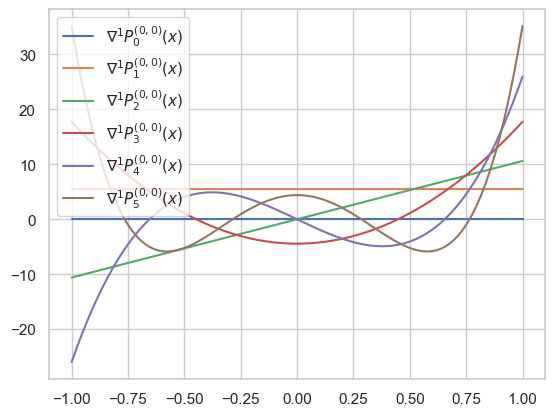

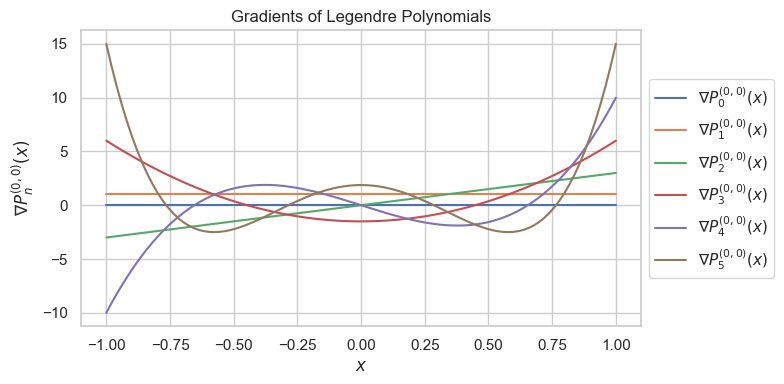

In [20]:
def jacobi_p(x: npt.NDArray, alpha: float, beta: float, n: int) -> npt.NDArray:
    """
    Evaluates first `n+1` Jacobi polynomials at points `x` with parameters `alpha` and `beta`.
    Reflects L2, slide 12.

    Arguments:
        x: Points at which to evaluate the polynomials, shape (m,)
        alpha: Jacobi parameter, $α > -1$
        beta: Jacobi parameter, $β > -1$
        n: Highest order polynomial to compute (must be positive)

    Returns: Array of shape (m, n+1) where each column corresponds to a Jacobi polynomial
        Note that this is essentially the Vandermonde matrix for Jacobi polynomials.
    """
    assert n >= 0, "n must be non-negative"

    P = np.empty((len(x), n + 1))

    P[:, 0] = 1.0
    if n == 0:
        return P

    P[:, 1] = 1 / 2 * (alpha - beta + (alpha + beta + 2) * x)
    if n == 1:
        return P

    for k in range(1, n):
        a_nm1_n = (
            2
            * (k + alpha)
            * (k + beta)
            / ((2 * k + alpha + beta + 1) * (2 * k + alpha + beta))
        )
        a_n_n = (alpha**2 - beta**2) / (
            (2 * k + alpha + beta + 2) * (2 * k + alpha + beta)
        )
        a_np1_n = (
            2
            * (k + 1)
            * (k + alpha + beta + 1)
            / ((2 * k + alpha + beta + 2) * (2 * k + alpha + beta + 1))
        )

        P[:, k + 1] = ((a_n_n + x) * P[:, k] - a_nm1_n * P[:, k - 1]) / a_np1_n

    return P


def jacobi_p_normalisation_const(
    alpha: float, beta: float, n: int | npt.NDArray
) -> int | npt.NDArray:
    """
    Computes the normalisation constant for Jacobi polynomials.
    Reflects $γ_n^(α,β)$ from L2, slide 11.

    Arguments:
        alpha: Jacobi parameter, $α > -1$
        beta: Jacobi parameter, $β > -1$
        n: npt.ArrayLike

    Returns: normalisation constant(s) $γ$ for Jacobi polynomials $P_n$
    """
    return (
        2 ** (alpha + beta + 1)
        * (gamma(n + alpha + 1) * gamma(n + beta + 1))
        / (factorial(n) * (2 * n + alpha + beta + 1) * gamma(n + alpha + beta + 1))
    )


def jacobi_p_normalised(
    x: npt.NDArray, alpha: float, beta: float, n: int
) -> npt.NDArray:
    """
    Convenience function to get normalized Jacobi polynomials using `jacobi_p` and `jacobi_p_normalisation_const`.
    """
    P = jacobi_p(x, alpha, beta, n)
    norm_const = jacobi_p_normalisation_const(alpha, beta, np.arange(n + 1))
    return P / np.sqrt(norm_const)


def grad_orthonormal_jacobi_p(x, alpha, beta, n, k):
    grad_ortho_p = np.empty((len(x), n + 1))

    for i in range(n + 1):
        if i == 0:
            p = np.zeros_like(x)
        elif i == 1:
            p = np.ones_like(x)
        else:
            p = jacobi_p_normalised(x, alpha + 1, beta + 1, i - 1)[:, i - 1]

        coeff = (
            1
            * gamma(alpha + beta + n + 1 + k)
            / (2**k * gamma(alpha + beta + n + 1))
            * np.sqrt(
                jacobi_p_normalisation_const(alpha + k, beta + k, n - k)
                / jacobi_p_normalisation_const(alpha, beta, n)
            )
        )

        grad_ortho_p[:, i] = coeff * p

    return grad_ortho_p


x = np.linspace(-1, 1, 100)
plt.figure()
alpha, beta = 0, 0
n = 5
k = 1
P_grad = grad_orthonormal_jacobi_p(x, alpha, beta, n, k)
for i, p in enumerate(P_grad.T):
    plt.plot(x, p, label=f"$\\nabla^1 P_{{{i}}}^{{({alpha}, {beta})}}(x)$")
plt.legend()


# Actually we should just need the regular one given the lectures, so this is very easy
def grad_jacobi_p(x: npt.NDArray, alpha: float, beta: float, n: int) -> npt.NDArray:
    """
    Computes the gradient of the first `n+1` Jacobi polynomials at nodes `x`.
    Reflects L2, slide 15.

    Arguments:
        x: Points at which to evaluate the gradients, shape (m,)
        alpha: Jacobi parameter, $α > -1$
        beta: Jacobi parameter, $β > -1$
        n: Highest order polynomial to compute (must be positive)
    Returns: Array of shape (m, n+1) where each column corresponds to the gradient of a Jacobi polynomial
    """
    grad_p = np.empty((len(x), n + 1))

    for i in range(n + 1):
        if i == 0:
            p_i = np.zeros_like(x)
        else:
            p_i = jacobi_p(x, alpha + 1, beta + 1, i - 1)[:, i - 1]

        coeff = 1 / 2 * (alpha + beta + i + 1)
        grad_p[:, i] = coeff * p_i

    return grad_p


plt.figure(figsize=(8, 4), layout="constrained")
P_grad = grad_jacobi_p(x, alpha, beta, n=6)[:, :6]
for i, p in enumerate(P_grad.T):
    plt.plot(x, p, label=f"$\\nabla P_{{{i}}}^{{({alpha}, {beta})}}(x)$")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Gradients of Legendre Polynomials")
plt.xlabel("$x$")
plt.ylabel("$\\nabla P_n^{(0,0)}(x)$")
plt.tight_layout()
plt.savefig(
    "report/output/2k_polynomial_grad_legendre.png", dpi=600, bbox_inches="tight"
)


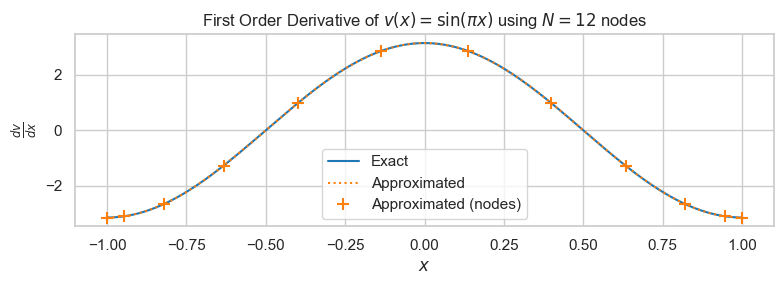

In [21]:
def v(x):
    return np.sin(np.pi * x)


def dv_dx(x):
    return np.pi * np.cos(np.pi * x)


alpha = 0.0  # Legendre
beta = 0.0  # Legendre
N_nodes = 12
P_nodes = N_nodes - 1
assert N_nodes > 1

x_nodes = JacobiGL(alpha, beta, P_nodes)
w_nodes = (
    2
    / (N_nodes * (N_nodes + 1))
    * 1
    / ((jacobi_p(x_nodes, alpha, beta, N_nodes) ** 2)[:, N_nodes])
)

# Modal basis functions
V = jacobi_p(x_nodes, alpha, beta, P_nodes)

# Derivatives of modal basis functions at nodes
V_x = grad_jacobi_p(x_nodes, alpha, beta, P_nodes)

diff_matrix = V_x @ np.linalg.inv(V)

# Now get nodes and evaluate
v_nodal = v(x_nodes)

# Evaluate derivative using differentiation matrix
dv_approx_nodal = diff_matrix @ v_nodal
dv_exact_nodal = dv_dx(x_nodes)

x_fine = np.linspace(-1, 1, 1000)
dv_exact_fine = dv_dx(x_fine)
dv_approx_fine = grad_jacobi_p(x_fine, alpha, beta, P_nodes) @ np.linalg.solve(
    V, v_nodal
)


plt.figure(figsize=(8, 3))
plt.plot(x_fine, dv_exact_fine, "-", label="Exact", color="tab:blue")
plt.plot(x_fine, dv_approx_fine, ":", label="Approximated", color="tab:orange")
plt.plot(
    x_nodes,
    dv_approx_nodal,
    "+",
    label="Approximated (nodes)",
    color="tab:orange",
    markersize=8,
    markeredgewidth=1.5,
)
plt.xlabel("$x$")
plt.ylabel(r"$\frac{dv}{dx}$")
plt.title(rf"First Order Derivative of $v(x) = \sin(\pi x)$ using $N={N_nodes}$ nodes")
plt.legend()

plt.tight_layout()
plt.savefig("report/output/2k_grad_v.png", dpi=600, bbox_inches="tight")


N=2, L2 Error=4.442882938158366
N=3, L2 Error=3.0350668484153798
N=4, L2 Error=1.5632984946589248
N=5, L2 Error=0.8529678226586327
N=6, L2 Error=0.15230672163535905
N=7, L2 Error=0.08109864041041084
N=8, L2 Error=0.007358594874265968
N=9, L2 Error=0.003868534300828799
N=10, L2 Error=0.0002139379832265061
N=11, L2 Error=0.00011153709892238176
N=12, L2 Error=4.165711151230813e-06
N=13, L2 Error=2.158925179750781e-06
N=14, L2 Error=5.820073734393195e-08
N=15, L2 Error=3.00286872180249e-08
N=16, L2 Error=6.123456775069589e-10
N=17, L2 Error=3.148422526338064e-10
N=18, L2 Error=5.030579349660623e-12
N=19, L2 Error=2.5779488496132483e-12
N=20, L2 Error=3.4632200819778486e-14
N=21, L2 Error=1.8016924170965583e-14
N=22, L2 Error=8.187278653976777e-15
N=23, L2 Error=1.118768602298871e-14
N=24, L2 Error=1.6149335043937504e-14
N=25, L2 Error=1.1051673804396474e-14
N=26, L2 Error=1.4247344709931687e-14
N=27, L2 Error=1.0149392976632484e-14
N=28, L2 Error=1.4177691727909613e-14
N=29, L2 Error=1.299

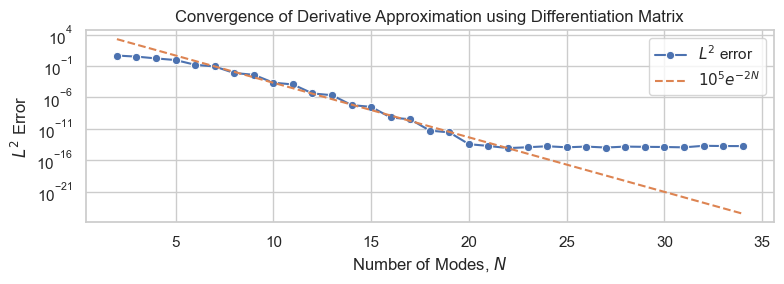

In [ ]:
Ns = np.arange(2, 35, dtype=int)
convergence_data = []
for N_nodes in Ns:
    P_nodes = N_nodes - 1
    assert N_nodes > 1

    x_nodes = JacobiGL(alpha, beta, P_nodes)

    # Modal basis functions
    V = jacobi_p(x_nodes, alpha, beta, P_nodes)

    # Derivatives of modal basis functions at nodes
    V_x = grad_jacobi_p(x_nodes, alpha, beta, P_nodes)

    diff_matrix = V_x @ np.linalg.inv(V)

    # Now get nodes and evaluate
    v_nodal = v(x_nodes)

    # Evaluate derivative using differentiation matrix
    dv_approx_nodal = diff_matrix @ v_nodal
    dv_exact_nodal = dv_dx(x_nodes)

    # We need to also do integration to get error, which we again do using
    # Vandermonde through the mass matrix, which must be constructed using the
    # ortho_NORMAL_ polynomials
    V_orthonormal = jacobi_p_normalised(x_nodes, alpha, beta, P_nodes)
    M = np.linalg.inv(V_orthonormal @ V_orthonormal.T)
    errors_nodal = dv_exact_nodal - dv_approx_nodal

    error_l2 = np.sqrt(errors_nodal.T @ M @ errors_nodal)
    print(f"N={N_nodes}, L2 Error={error_l2}")

    convergence_data.append(
        {
            "N_nodes": N_nodes,
            "error_l2": error_l2,
        }
    )

df = pd.DataFrame(convergence_data)
plt.figure(figsize=(8, 3))
sns.lineplot(data=df, x="N_nodes", y="error_l2", marker="o", label="$L^2$ error")
plt.plot(
    Ns,
    100_000 * np.exp(-2 * Ns),
    label="$10^5 e^{-2N}$",
    ls="--",
)
plt.semilogy()
plt.xlabel("Number of Modes, $N$")
plt.ylabel("$L^2$ Error")
plt.title("Convergence of Derivative Approximation using Differentiation Matrix")
plt.legend()
plt.tight_layout()

plt.savefig("report/output/2k_convergence.png", dpi=600, bbox_inches="tight")

### l - Mass Matrix

In [23]:
def u1(x):
    return np.ones_like(x, dtype=float)

def int_u1_sq(x, a, b):
    return b - a

def u2(x):
    return np.sin(x)

def int_u2_sq(x, a, b):
    indef = lambda x: x/2 - np.sin(2 * x) / 4
    return indef(b) - indef(a)

def xbar(x, a, b):
    return 0.5 * (b - a) * x + 0.5 * (a + b)

alpha = 0.0
beta = 0.0
N_nodes = 9
P_nodes = N_nodes - 1
a = 0
b = 2

x_nodes = JacobiGL(alpha, beta, P_nodes)
xbar_nodes = xbar(x_nodes, a, b)

V_orthonormal = jacobi_p_normalised(x_nodes, alpha, beta, P_nodes)
M = np.linalg.inv(V_orthonormal @ V_orthonormal.T)
M_transformed = (b - a) / 2 * M

u1_nodal = u1(xbar_nodes)
u1_norm_approx = np.sqrt(u1_nodal.T @ M_transformed @ u1_nodal)
u1_norm_exact = np.sqrt(int_u1_sq(xbar_nodes, a, b))
u1_error = np.abs(u1_norm_approx - u1_norm_exact)
print(f"U1 approx: {u1_norm_approx}, U1 exact: {u1_norm_exact}, U1 error: {u1_error}")

u2_nodal = u2(xbar_nodes)
u2_norm_approx = np.sqrt(u2_nodal.T @ M_transformed @ u2_nodal)
u2_norm_exact = np.sqrt(int_u2_sq(xbar_nodes, a, b))
u2_error = np.abs(u2_norm_approx - u2_norm_exact)
print(f"U2 approx: {u2_norm_approx}, U2 exact: {u2_norm_exact}, U2 error: {u2_error}")


U1 approx: 1.4142135623730951, U1 exact: 1.4142135623730951, U1 error: 0.0
U2 approx: 1.0905047564440025, U2 exact: 1.0905047564439974, U2 error: 5.10702591327572e-15
